In [3]:
#----------- Question3(a) -----------#
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures as PF
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error as MSE
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import math 

In [4]:
# x and y split for both train data and test data
train_data = pd.read_csv('faces_train_data.csv')
test_data = pd.read_csv('faces_test_data.csv')

# preprint(test_data)
#print(type(train_data['x0'][0]))

train_x = train_data.drop(columns = ['smiling'])
train_y = train_data['smiling']


test_x = test_data.drop(columns = ['smiling'])
test_y = test_data['smiling']

#z1 = train_x.describe()
z1 = test_x.describe()
#print(z1)
x_train_min = 1000
x_train_max = -1000
y_train_min = 1000
y_train_max = -1000
for i in range(len(z1.loc['min'])):
    if i %2 == 0:
        if z1.loc['min'][i] < x_train_min:
            x_train_min = z1.loc['min'][i]
        if z1.loc['max'][i] > x_train_max:
            x_train_max = z1.loc['max'][i]
    if i % 2 == 1:
        if z1.loc['min'][i] < y_train_min:
            y_train_min = z1.loc['min'][i]
        if z1.loc['max'][i] > y_train_max:
            y_train_max = z1.loc['max'][i]
            
            
print(x_train_min)
print(y_train_min)
print(x_train_max)
print(y_train_max)
            



-3.846
-2.6239999999999997
3.9010000000000002
3.641


In [5]:
z1

,x0,y0,x1,y1,x2,y2,x3,y3,x4,y4,...,x63,y63,x64,y64,x65,y65,x66,y66,x67,y67
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,...,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,-1.924105,1.466505,-1.913906,1.015347,-1.854442,0.556577,-1.742358,0.100410,-1.549113,-0.322024,...,0.210966,-0.109595,0.686934,-0.101417,0.221621,-0.256826,0.004443,-0.281469,-0.211166,-0.262411
std,0.586384,0.412054,0.548511,0.389851,0.529543,0.368793,0.524712,0.348176,0.498277,0.322613,...,0.049823,0.049170,0.202535,0.147125,0.082986,0.141866,0.073667,0.139187,0.087036,0.137586
min,-3.846000,-2.116000,-3.673000,-2.341000,-3.487000,-2.539000,-3.287000,-2.624000,-3.005000,-2.511000,...,-0.071000,-0.280000,-0.133000,-0.672000,-0.282000,-1.087000,-0.507000,-1.109000,-0.732000,-1.087000
25%,-2.250000,1.243000,-2.220250,0.816000,-2.150000,0.364000,-2.049000,-0.092250,-1.843000,-0.502250,...,0.188000,-0.138000,0.580000,-0.180000,0.185750,-0.347000,-0.027000,-0.374000,-0.254000,-0.353000
50%,-1.949000,1.465000,-1.921000,1.016000,-1.860500,0.562500,-1.758500,0.105500,-1.582500,-0.316500,...,0.217000,-0.108000,0.704000,-0.097500,0.225000,-0.240000,0.000000,-0.263000,-0.213000,-0.244000
75%,-1.626250,1.686500,-1.627750,1.221500,-1.562750,0.753500,-1.448500,0.302000,-1.282000,-0.128500,...,0.244000,-0.078000,0.816000,-0.000000,0.264000,-0.142000,0.036000,-0.166000,-0.175000,-0.155000
max,1.613000,3.641000,1.067000,3.205000,0.522000,2.718000,0.000000,2.510000,0.309000,2.213000,...,0.323000,0.248000,1.269000,0.702000,0.603000,0.248000,0.411000,0.041000,0.259000,0.168000


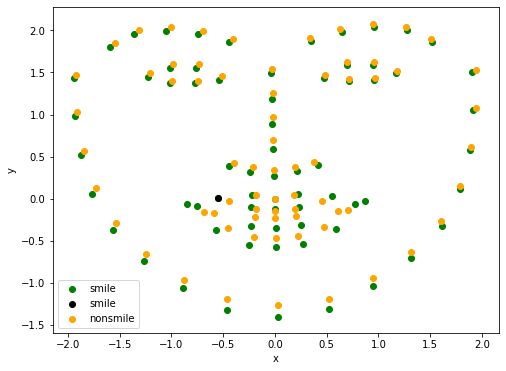

In [35]:
smile_train_x = train_data[train_data['smiling'] == 1]
nonsmile_train_x = train_data[train_data['smiling'] == 0]

smile_train_x = smile_train_x.drop(columns = ['smiling'])
a = smile_train_x.describe()
a = np.array(a.loc['mean'])




plt.figure(figsize=(8,6))
#ax = plt.subplot(1,2,1)

smile_x = [a[i] for i in range(0, len(a), 2)]
smile_y = [a[i + 1]  for i in range(0, len(a) , 2)]

plt.scatter(smile_x, smile_y, c = 'green',label = 'smile')
plt.scatter(smile_x[49], smile_y[49], c = 'black',label = 'smile')
plt.xlabel("x")
plt.ylabel("y")

#plt.legend()
#ax2 = plt.subplot(1,2,2)

nonsmile_train_x = nonsmile_train_x.drop(columns = ['smiling'])
a = nonsmile_train_x.describe()
a = np.array(a.loc['mean'])

smile_x = [a[i] for i in range(0, len(a), 2)]
smile_y = [a[i + 1]  for i in range(0, len(a) , 2)]
plt.scatter(smile_x, smile_y, c = 'orange',label = 'nonsmile')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("")

plt.savefig("IAML_Q3b.png")

plt.show()

In [33]:
#----------- Question3(e) -----------#
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.metrics import accuracy_score

for md in [2, 8, 20]:
    model = DTC(max_depth = md, random_state = 2001)
    model.fit(train_x, train_y)
    pre_train_y = model.predict(train_x)
    print("Training accuracy")
    print(accuracy_score(pre_train_y, train_y))
    pre_test_y = model.predict(test_x)
    print("Test accuracy")
    print(accuracy_score(pre_test_y, test_y))
    print("\n")

Training accuracy
0.7947916666666667
Test accuracy
0.7816666666666666


Training accuracy
0.9335416666666667
Test accuracy
0.8408333333333333


Training accuracy
1.0
Test accuracy
0.815




In [37]:
#----------- Question3(f) -----------#
clf = DTC(max_depth = 8, random_state = 2001)
clf.fit(train_x,train_y)

a = clf.feature_importances_
print(a)

list(train_data.columns[clf.feature_importances_.argsort()[::-1][0:5]])

[0.         0.00171789 0.00424141 0.00931392 0.00099457 0.
 0.00800374 0.         0.         0.         0.00554869 0.
 0.         0.         0.         0.03554359 0.         0.03275378
 0.         0.00569425 0.         0.         0.         0.00097483
 0.         0.00294131 0.         0.         0.00221963 0.00251957
 0.         0.         0.         0.         0.00250062 0.
 0.00097417 0.00585508 0.         0.         0.00195484 0.
 0.         0.00158038 0.00078737 0.00285785 0.00087485 0.
 0.         0.00481308 0.         0.         0.         0.0015585
 0.         0.         0.         0.00136318 0.         0.08831447
 0.         0.0053233  0.         0.00246417 0.00095745 0.01742446
 0.         0.00141094 0.         0.00125979 0.         0.
 0.00330107 0.         0.         0.         0.         0.00837082
 0.         0.00139976 0.         0.         0.00093318 0.
 0.         0.0017497  0.         0.00106043 0.         0.
 0.00228628 0.00503367 0.         0.         0.         0.
 

['x50', 'y48', 'y29', 'x53', 'x49']